# Reality Check #2: The Euler–Bernoulli Beam

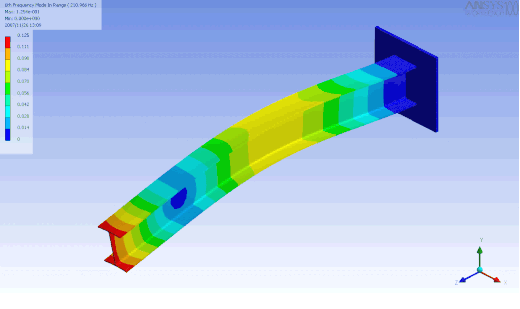


Finite element method model of a vibration of a wide-flange beam (I-beam). [image taken from wikipedia](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory#/media/File:Beam_mode_6.gif)

The Euler-Bernoulli beam is a fundamental model for a material bending under stress. Discretization converts the differential equation model into a system of linear equations. The smaller the discretization size, the larger is the resulting system of equations. This example will provide us an interesting case study of the roles of system size and ill-conditioning in scientific computation.

The vertical displacement of the beam is represented by a function $y(x)$, where $0\leq x \leq L$ along the beam of length $L$. We will use MKS units in the calculation: meters, kilograms, seconds. The displacement $y(x)$ satisfies the Euler-Bernoulli equation
$$ E ~ I ~ y'''' = f(x) \quad\quad\quad\quad\quad(2.27)$$
where $E$, the Young's modulus of the material, and $I$, the area moment of inertia, are constant along the beam. The right-hand-side $f(x)$ is the applied load, including the weight of the beam, in force per unit length.

Techniques for discretizing derivatives are found in Chapter 5, where it will be shown that a reasonable approximation for the fourth derivative is
$$
y''''
=
\frac{1}{h^4}\left(
  y(x-2h) - 4 y(x-h) + 6 y(x) - 4 y(x+h) + y(x+2h)
  \right)
  \quad\quad\quad\quad\quad(2.28)
$$
for a small increment $h$. The discretization error of this approximation is proportional to $h^2$ (see Exercise 5.1.21). Our strategy will be to consider the beam as the union of many segments of length $h$, and to apply the discretized version of the differential equation on each segment.

For a positive integer $n$, set $h=L/n$. Consider the evenly spaced grid $0 = x_0 < x_1 < \ldots < x_n = L$, where $h = x_{i} - x_{i-1}$ for $i=1,\ldots,n$. Replacing the differential equation (2.27) with the difference approximation (2.28) to get the system of linear equations for the displacements
$y_i = y(x_i)$ yields
$$
y_{i-2} - 4 y_{i-1} + 6 y_i  - 4 y_{i+1} + y_{i+2} = \frac{h^4}{ E ~ I }f(x_i).
  \quad\quad\quad\quad\quad(2.29)
$$

We will develop $n$ equations in the $n$ unknowns $y_1 < \ldots < y_n $. The coefficient matrix, or structure matrix, will have coefficients from the left-hand side of this equation. However, notice that we must alter the equations near the ends of the beam to take the boundary conditions into account.

A diving board is a beam with one end clamped at the support, and the opposite end free. This is called the **clamped-free** beam or sometimes the **cantilever** beam. The boundary conditions for the clamped (left) end and free (right) end are $$y(0)= y'(0)=y''(L)=y'''(L)=0.$$

In particular, $y(0)=0.$ Note that finding $y_1$, however, presents us with a problem, since applying the approximation (2.29) to the differential equation (2.27) at $x_1$ results in
$$
y_{-1} - 4 y_{0} + 6 y_1  - 4 y_{2} + y_{3} = \frac{h^4}{ E ~ I }f(x_1),
  \quad\quad\quad\quad\quad(2.30)
$$
and $y_{-1}$ is not defined. Instead, we must use an alternate derivative approximation at the point $x_1$ near the clamped end. Exercise 5.1.22(a) derives the approximation
$$
y''''(x_1)
=
\frac{1}{h^4}\left(
  16 y(x_1) - 9 y(x_1+h) + \frac{8}{3} y(x_1+2h) - \frac{1}{4} y(x_1+3h)
  \right)
  \quad\quad\quad\quad\quad(2.31)
$$
which is valid when $y(0)= y'(0)=0.$

Calling the approximation "valid," for now, means that the discretization error of the approximation is proportional to $h^2$, the same as for equation (2.28). In theory, this means that the error in approximating the derivative in this way will decrease toward zero in the limit of small $h$. This concept will be the focal point of the discussion of numerical differentiation in Chapter 5. The result for us is that we can use approximation (2.31) to take the endpoint condition into account for $i=1$, yielding
$$
16 y_1 - 9 y_2 + \frac{8}{3} y_2 - \frac{1}{4} y_4 = \frac{h^4}{ E ~ I }f(x_1).
$$
The free right end of the beam requires a little more work because we must compute $y_i$ all the way to the end of the beam. Again, we need alternative derivative approximations at the last two points $x_{n-1}$ and $x_n$. Exercise 5.1.22 gives the approximations
$$
y''''(x_{n-1})
=
\frac{1}{17h^4}\left(
  -28 y_n + 72 y_{n-1} - 60 y_{n-2} + 16 y_{n-3}
  \right)
  \quad\quad\quad\quad\quad(2.32)
$$
$$
y''''(x_{n})
=
\frac{1}{17h^4}\left(
  72 y_n -156 y_{n-1} + 96 y_{n-2} - 12 y_{n-3}
  \right)
  \quad\quad\quad\quad\quad(2.33)
$$
which are valid under the assumption
$y''(x_n)=y'''(x_n)=0.$
Now we can write down the system of n equations in n unknowns for the diving board. This matrix equation summarizes our approximate versions of the original differential equation (2.27) at each point $x_1, \ldots , x_n$, accurate within terms of order $h^2$:
$$
\left[
  \begin{array}{rrrrrrrrr}
  16 & -9 & \frac{8}{3} & -\frac{1}{4} \\
  -4 & 6 & -4 & 1 \\
  1 & -4 & 6 & -4 & 1 \\
    & 1 & -4 & 6 & -4 & 1 \\
    &   & \ddots & \ddots & \ddots & \ddots & \ddots \\
    &   &        &1 & -4 & 6 & -4 & 1 \\
    &   &        &  &1 & -4 & 6 & -4 & 1 \\
    &   &        &  &&\frac{16}{17} & -\frac{60}{17} & \frac{72}{17} & -\frac{28}{17} \\
    &   &        &  &&-\frac{12}{17} & \frac{96}{17} & -\frac{156}{17} & \frac{72}{17} \\
  \end{array}
\right]
\left[
  \begin{array}{c}
y_1\\ y_2 \\ y_3\\y_4 \\ \vdots \\y_{n-3}\\y_{n-2}\\y_{n-1}\\y_{n}
  \end{array}
\right]
=
\left[
  \begin{array}{c}
f(x_1)\\ f(x_2) \\ f(x_3)\\f(x_4) \\ \vdots \\f(x_{n-3})\\f(x_{n-2})\\f(x_{n-1})\\f(x_{n})
  \end{array}
\right]
\quad\quad\quad\quad\quad(2.34)
$$

The structure matrix $A$ in (2.34) is a banded matrix, meaning that all entries sufficiently far from the main diagonal are zero. Specifically, the matrix entries $a_{ij}=0$, except for $|i-j| \leq 3$. The bandwidth of this banded matrix is 7, since $i-j$ takes on 7 values for nonzero $a_{ij}$.

Finally, we are ready to model the clamped-free beam. Let us consider a solid wood diving board composed of Douglas fir. Assume that the diving board is
$L = 2$ meters long, 30 cm wide, and 3 cm thick. The density of Douglas fir is approximately 480 kg/m$^3$. One Newton of force is 1 kg-m/sec$^2$, and the Young's modulus of this wood is approximately $E = 1.3 \times 10^{10}$ Pascals, or Newton/m$^2$. The area moment of inertia $I$ around the center of mass of a beam is $w~d^3/12$, where $w$ is the width and $d$ the thickness of the beam.

You will begin by calculating the displacement of the beam with no payload, so that $f(x)$ represents only the weight of the beam itself, in units of force per meter. Therefore $f(x)$ is the mass per meter $480wd$ times the downward acceleration of gravity $-g=-9.81$m/sec$^2$, or the constant $f(x)=f=-480wdg$. The reader should check that the units match on both sides of (2.27). There is a closed-form solution of (2.27) in the case $f$ is constant, so that the result of your computation can be checked for accuracy.

Following the check of your code for the unloaded beam, you will model two further cases. In the first, a sinusoidal load (or "pile") will be added to the beam. In this case, there is again a known closed-form solution, but the derivative approximations are not exact, so you will be able to monitor the error of your modeling as a function of the grid size $h$, and see the effect of conditioning problems for large $n$. Later, you will put a diver on the beam.


# Questions

#1.

**( handwritten or typed )**

Prove the second-order formula for the third derivative
$$ f''''(x) = \frac{f(x-2h)  - 4 f(x-h) +6f(x)-4f(x+h)+f(x+2h)}{h^4}+O(h^2).$$
(This is Exercise EX.5.1.21 in Sauer.)



In [ ]:
###Click here to view the PDF of my work from Q1
!pip install IPython

from IPython.display import IFrame

pdf_url = 'https://drive.google.com/file/d/19w8gOFm9eeVR4rloIOfv0PcPY8D_wrA9/view?usp=sharing'
embed_url = pdf_url.replace("/view?usp=sharing", "/preview")

display(IFrame(embed_url, width=800, height=600))



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.2 MB/s eta 0:00:00


#2.

**( colab )**

Write a python program to define the structure matrix $A$ in Equation (2.34). Then, using the **np.linalg.solve** command or code of your own design, solve the system for the displacements $y_i$ using $n=10$ grid steps. Plot the solution against the correct solution $$y(x) = \frac{f}{24EI}x^2(x^2-4Lx+6L^2),$$ where $f=f(x)$ is the constant defined above. Check the error at the end of the beam, $x = L$ meters. In this simple case the derivative approximations are exact, so your error should be near machine roundoff.

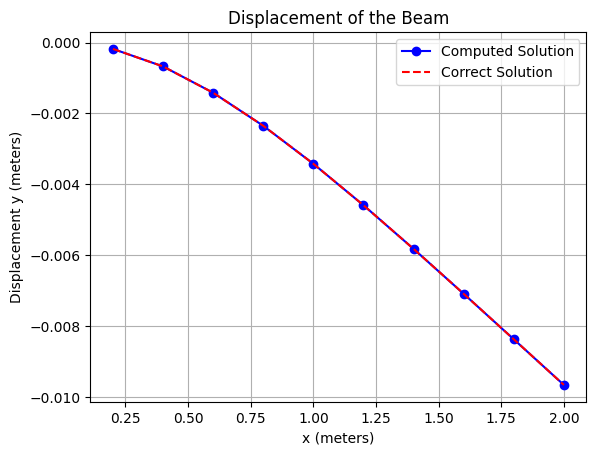

Error at x = L: 1.474514954580286e-15


In [ ]:
# Used ChatGPT for help with the plot


import numpy as np
import matplotlib.pyplot as plt

n = 10
L = 2
w = .3
t = .03
d = 480
E = 1.3e10
I = w * (t ** 3) / 12
g = -9.81
f = -480 * w * t * -g
h = L / n

A = np.zeros((n,n))
A[0,0] = 16
A[0,1] = -9
A[0,2] = 8/3
A[0,3] = -1/4
A[1,0] = -4
A[1,1] = 6
A[1,2] = -4
A[1,3] = 1

for i in range (0, n - 4):
  A[i+2, i] = 1
  A[i+2, i+1] = -4
  A[i+2, i+2] = 6
  A[i+2, i+3] = -4
  A[i+2, i+4] = 1

A[-2, -4] = 16/17
A[-2, -3] = -60/17
A[-2, -2] = 72/17
A[-2, -1] = -28/17

A[-1, -4] = -12/17
A[-1, -3] = 96/17
A[-1, -2] = -156/17
A[-1, -1] = 72/17

b = np.zeros(n)

for i in range (n):
  b[i] =  f * h ** 4 / (E * I)

y = np.linalg.solve(A, b)

x = np.linspace(h, L, n)
y_correct = (f / (24 * E * I)) * x**2 * (x**2 - 4 * L * x + 6 * L**2)

plt.plot(x, y, 'bo-', label='Computed Solution')
plt.plot(x, y_correct, 'r--', label='Correct Solution')
plt.xlabel('x (meters)')
plt.ylabel('Displacement y (meters)')
plt.title('Displacement of the Beam')
plt.legend()
plt.grid(True)
plt.show()

error = np.abs(y[-1] - y_correct[-1])
print(f"Error at x = L: {error}")

#3.

**( colab )**

Rerun the calculation in Step 1 for $n = 10 \cdot 2^k$, where $k=1, \ldots, 8$. Make a table of the errors at $x=L$ for each $n$. Add a column to your table with the condition number of $A$ as a function of $n$.

**( handwritten or type )**

For which $n$ is the error smallest? Why does the error begin to increase with $n$ after a certain point?

In [ ]:
k = [1,2,3,4,5,6,7,8]
for j in k:
  n = 10 * (2 ** j)

  h = L / n

  A = np.zeros((n,n))
  A[0,0] = 16
  A[0,1] = -9
  A[0,2] = 8/3
  A[0,3] = -1/4
  A[1,0] = -4
  A[1,1] = 6
  A[1,2] = -4
  A[1,3] = 1

  for i in range (0, n - 4):
    A[i+2, i] = 1
    A[i+2, i+1] = -4
    A[i+2, i+2] = 6
    A[i+2, i+3] = -4
    A[i+2, i+4] = 1

  A[-2, -4] = 16/17
  A[-2, -3] = -60/17
  A[-2, -2] = 72/17
  A[-2, -1] = -28/17

  A[-1, -4] = -12/17
  A[-1, -3] = 96/17
  A[-1, -2] = -156/17
  A[-1, -1] = 72/17
  b = np.zeros(n)

  for i in range (n):
    b[i] =  f * h ** 4 / (E * I)

  y = np.linalg.solve(A, b)

  x = np.linspace(h, L, n)
  y_correct = (f / (24 * E * I)) * x**2 * (x**2 - 4 * L * x + 6 * L**2)

  error = np.abs(y[-1] - y_correct[-1])
  print(f"Error at 10 * 2 ^ {j} = L: {error}")

Error at 10 * 2 ^ 1 = L: 1.0443035325380379e-15
Error at 10 * 2 ^ 2 = L: 1.5213524884316598e-15
Error at 10 * 2 ^ 3 = L: 5.717318979359121e-13
Error at 10 * 2 ^ 4 = L: 2.3234390106319225e-11
Error at 10 * 2 ^ 5 = L: 2.32105914349523e-11
Error at 10 * 2 ^ 6 = L: 1.167849237454499e-10
Error at 10 * 2 ^ 7 = L: 2.2623715024636115e-08
Error at 10 * 2 ^ 8 = L: 2.2872279200648882e-07


The error is the smallest at n = 10 * 2 ^ 1. The error begins to increase at a certain point because the end conditions begin to become misconstrued. I mean this by each end condition has two rows, whereas when we are increasing our n by a large amount we are increasing the middle rows of the matrix as well. Getting arbitrarily large n's begins to misconstrue the solution more than getting a closer approximation. Likewise, an arbitrarily large n generates an arbitrarily small h which is used to build matrix b, both of which are being used in np.linalg.solve.

#4.

**( handwritten or typed )**

Add a sinusoidal pile to the beam. This means adding a function of form
$s(x) = - p g \sin(\pi/L x)$ to the force term $f(x)$. Prove that the solution
$$y(x) = \frac{f}{24EI}x^2(x^2-4Lx+6L^2)
- \frac{p g L}{EI\pi}
\left(
  \frac{L^3}{\pi^3}\sin( \frac{\pi}{L}x )
  - \frac{x^3}{6}
  + \frac{L}{2}x^2
  - \frac{L^2}{\pi^2}x
\right)
$$
satisfies the Euler–Bernoulli beam equation and the clamped-free boundary conditions.

In [ ]:
pdf_url = 'https://drive.google.com/file/d/1w6Nw3zx4kZaQzb9mV4Ddd5kSstLv3wwQ/view?usp=sharing'
embed_url = pdf_url.replace("/view?usp=sharing", "/preview")

display(IFrame(embed_url, width=800, height=600))

#5.

**( colab )**

Rerun the calculation as in Step 3 for the sinusoidal load. (Be sure to include the weight of the beam itself.) Set $p = 100$ kg/m and plot your computed solutions against the correct solution. Plot the error versus $h$ on a log-log graph.

**( handwritten or typed )**

For which $n$ is the error smallest? Why does the error begin to increase with $n$ after a certain point? (Hint: look at the column with condition number values.) Is the error at $x = L$ proportional to $h^2$ as claimed above? Does the condition number come into play?

Error at 10 * 2 ^ 1 = L: 0.0005376960082279919
Condition number : 282259.2110656242
Error at 10 * 2 ^ 2 = L: 0.00013546487280816089
Condition number : 4389447.784208254
Error at 10 * 2 ^ 3 = L: 3.393091562700623e-05
Condition number : 69191086.54957426
Error at 10 * 2 ^ 4 = L: 8.486473017474405e-06
Condition number : 1098636687.8517098
Error at 10 * 2 ^ 5 = L: 2.12168707795779e-06
Condition number : 17510435014.495995
Error at 10 * 2 ^ 6 = L: 5.288022050797814e-07
Condition number : 279622904663.29645
Error at 10 * 2 ^ 7 = L: 1.5577559388246787e-07
Condition number : 4469488843701.891
Error at 10 * 2 ^ 8 = L: 2.9324105296490988e-06
Condition number : 71474878279820.17


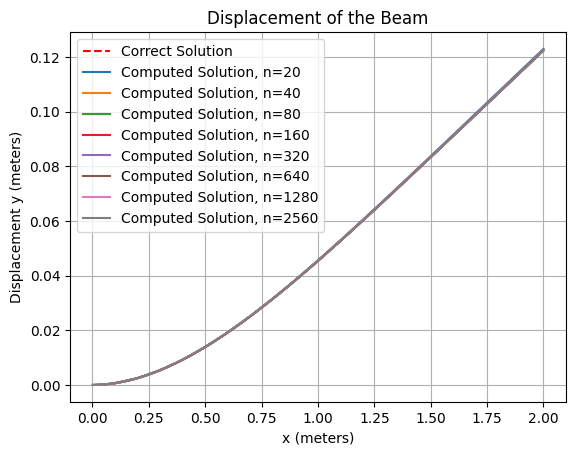

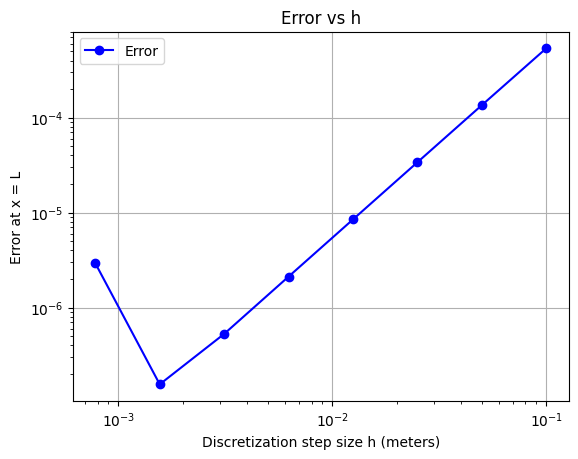

In [ ]:
# Used ChatGPT for help with the plots

import numpy as np
import matplotlib.pyplot as plt

n = 10
L = 2
w = 0.3
t = 0.03
d = 480
E = 1.3e10
I = w * (t ** 3) / 12
g = -9.81
f = -480 * w * t * -g
h = L / n
p = 100

plt.figure()

k = [1, 2, 3, 4, 5, 6, 7, 8]
h_val = []
errors = []
for j in k:
    n = 10 * (2 ** j)
    h = L / n
    h_val.append(h)

    A = np.zeros((n, n))
    A[0, 0] = 16
    A[0, 1] = -9
    A[0, 2] = 8 / 3
    A[0, 3] = -1 / 4
    A[1, 0] = -4
    A[1, 1] = 6
    A[1, 2] = -4
    A[1, 3] = 1

    for i in range(n - 4):
        A[i + 2, i] = 1
        A[i + 2, i + 1] = -4
        A[i + 2, i + 2] = 6
        A[i + 2, i + 3] = -4
        A[i + 2, i + 4] = 1

    A[-2, -4] = 16 / 17
    A[-2, -3] = -60 / 17
    A[-2, -2] = 72 / 17
    A[-2, -1] = -28 / 17

    A[-1, -4] = -12 / 17
    A[-1, -3] = 96 / 17
    A[-1, -2] = -156 / 17
    A[-1, -1] = 72 / 17

    b = np.zeros(n)
    x = np.linspace(h, L, n)

    for i in range(n):
      b[i] = f * h ** 4 / (E * I) - p * g * np.sin(np.pi * x[i] / L) * h ** 4 / (E * I)

    y = np.linalg.solve(A, b)

    y_correct = (f / (24 * E * I)) * x**2 * (x**2 - 4 * L * x + 6 * L**2) - \
           (p * g * L / (E * I * np.pi)) * (L**3 / np.pi**3 * np.sin(np.pi / L * x) - x**3 / 6 + L * x**2 / 2 - L**2 * x / np.pi**2)

    error = np.abs(y[-1] - y_correct[-1])
    errors.append(error)
    print(f"Error at 10 * 2 ^ {j} = L: {error}")
    print(f"Condition number : {np.linalg.cond(A)}")

    if j == 1:
      plt.plot(x, y_correct, 'r--', label='Correct Solution')
    plt.plot(x, y, label=f'Computed Solution, n={n}')

plt.xlabel('x (meters)')
plt.ylabel('Displacement y (meters)')
plt.title('Displacement of the Beam')
plt.legend()
plt.grid(True)
plt.show()



# Plot error vs h on a log-log graph
plt.figure()
plt.loglog(h_val, errors, 'bo-', label='Error')
plt.xlabel('Discretization step size h (meters)')
plt.ylabel('Error at x = L')
plt.title('Error vs h')
plt.grid(True)
plt.legend()
plt.show()

Error is the smallest at 10 * 2 ^ 7. The condition numbers just continue to get larger and larger, this observation is likely because we reach a certain point where having such small h values actually gives us less accurate approximations. There does seem to be a relationship with Error vs H^2 however we see after 10 * 2 ^ 7 which indicates this decreasing behavior isn't consistent for arbitrarily large k-values where k is seen as 10 * 2 ^ k. The condition number does come in to play because as h is becoming arbitrarily small the condition number is becoming arbitrarily large, and we've seen there is a certain threshold where this gives us less accurate approximations at L.